In [5]:
! pip install numpy

In [6]:
!pip install seaborn

In [11]:
! pip install folium

In [13]:
! pip install geopy

In [16]:
pip install --upgrade matplotlib


Note: you may need to restart the kernel to use updated packages.


In [19]:
! pip install Ipython

In [2]:
import numpy as np
import matplotlib.pyplot as plt  
import pandas as pd
import seaborn as sns
import sqlite3
from datetime import datetime
import folium
from geopy.geocoders import Nominatim
from matplotlib.colors import LinearSegmentedColormap
from IPython.display import display
import warnings
warnings.filterwarnings('ignore')
 

In [3]:
connection=sqlite3.connect('yelp.db')

In [4]:
connection

In [5]:
tables=pd.read_sql_query("SELECT name FROM sqlite_master where type='table'",connection)

In [6]:
tables

,name
0,business
1,review
2,checkin
3,tip
4,user


In [7]:
for table in tables['name']:
    display(pd.read_sql_query(f'select * from {table} limit 5 ' ,connection))


,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,categories
0,Pns2l4eNsfO8kk83dixA6A,"Abby Rappoport, LAC, CMQ","1616 Chapala St, Ste 2",Santa Barbara,CA,93101,34.426679,-119.711197,5.0,7,0,"Doctors, Traditional Chinese Medicine, Naturop..."
1,mpf3x-BjTdTEA3yCZrAYPw,The UPS Store,87 Grasso Plaza Shopping Center,Affton,MO,63123,38.551126,-90.335695,3.0,15,1,"Shipping Centers, Local Services, Notaries, Ma..."
2,tUFrWirKiKi_TAnsVWINQQ,Target,5255 E Broadway Blvd,Tucson,AZ,85711,32.223236,-110.880452,3.5,22,0,"Department Stores, Shopping, Fashion, Home & G..."
3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,4.0,80,1,"Restaurants, Food, Bubble Tea, Coffee & Tea, B..."
4,mWMc6_wTdE0EUBKIGXDVfA,Perkiomen Valley Brewery,101 Walnut St,Green Lane,PA,18054,40.338183,-75.471659,4.5,13,1,"Brewpubs, Breweries, Food"


,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,KU_O5udG6zpxOg-VcAEodg,mh_-eMZ6K5RLWhZyISBhwA,XQfwVwDr-v0ZS3_CbbE5Xw,3.0,0,0,0,"If you decide to eat here, just be aware it is...",2018-07-07 22:09:11
1,BiTunyQ73aT9WBnpR9DZGw,OyoGAe7OKpv6SyGZT5g77Q,7ATYjTIgM3jUlt4UM3IypQ,5.0,1,0,1,I've taken a lot of spin classes over the year...,2012-01-03 15:28:18
2,saUsX_uimxRlCVr67Z4Jig,8g_iMtfSiwikVnbP2etR0A,YjUWPpI6HXG530lwP-fb2A,3.0,0,0,0,Family diner. Had the buffet. Eclectic assortm...,2014-02-05 20:30:30
3,AqPFMleE6RsU23_auESxiA,_7bHUi9Uuf5__HHc_Q8guQ,kxX2SOes4o-D3ZQBkiMRfA,5.0,1,0,1,"Wow! Yummy, different, delicious. Our favo...",2015-01-04 00:01:03
4,Sx8TMOWLNuJBWer-0pcmoA,bcjbaE6dDog4jkNY91ncLQ,e4Vwtrqf-wpJfwesgvdgxQ,4.0,1,0,1,Cute interior and owner (?) gave us tour of up...,2017-01-14 20:54:15


,business_id,date
0,---kPU91CF4Lq2-WlRu9Lw,"2020-03-13 21:10:56, 2020-06-02 22:18:06, 2020..."
1,--0iUa4sNDFiZFrAdIWhZQ,"2010-09-13 21:43:09, 2011-05-04 23:08:15, 2011..."
2,--30_8IhuyMHbSOcNWd6DQ,"2013-06-14 23:29:17, 2014-08-13 23:20:22"
3,--7PUidqRWpRSpXebiyxTg,"2011-02-15 17:12:00, 2011-07-28 02:46:10, 2012..."
4,--7jw19RH9JKXgFohspgQw,"2014-04-21 20:42:11, 2014-04-28 21:04:46, 2014..."


,user_id,business_id,text,date,compliment_count
0,AGNUgVwnZUey3gcPCJ76iw,3uLgwr0qeCNMjKenHJwPGQ,Avengers time with the ladies.,2012-05-18 02:17:21,0
1,NBN4MgHP9D3cw--SnauTkA,QoezRbYQncpRqyrLH6Iqjg,They have lots of good deserts and tasty cuban...,2013-02-05 18:35:10,0
2,-copOvldyKh1qr-vzkDEvw,MYoRNLb5chwjQe3c_k37Gg,It's open even when you think it isn't,2013-08-18 00:56:08,0
3,FjMQVZjSqY8syIO-53KFKw,hV-bABTK-glh5wj31ps_Jw,Very decent fried chicken,2017-06-27 23:05:38,0
4,ld0AperBXk1h6UbqmM80zw,_uN0OudeJ3Zl_tf6nxg5ww,Appetizers.. platter special for lunch,2012-10-06 19:43:09,0


,user_id,name,review_count,yelping_since,useful,funny,cool,elite,friends,fans,...,compliment_more,compliment_profile,compliment_cute,compliment_list,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos
0,qVc8ODYU5SZjKXVBgXdI7w,Walker,585,2007-01-25 16:47:26,7217,1259,5994,2007,"NSCy54eWehBJyZdG2iE84w, pe42u7DcCH2QmI81NX-8qA...",267,...,65,55,56,18,232,844,467,467,239,180
1,j14WgRoU_-2ZE1aw1dXrJg,Daniel,4333,2009-01-25 04:35:42,43091,13066,27281,"2009,2010,2011,2012,2013,2014,2015,2016,2017,2...","ueRPE0CX75ePGMqOFVj6IQ, 52oH4DrRvzzl8wh5UXyU0A...",3138,...,264,184,157,251,1847,7054,3131,3131,1521,1946
2,2WnXYQFK0hXEoTxPtV2zvg,Steph,665,2008-07-25 10:41:00,2086,1010,1003,"2009,2010,2011,2012,2013","LuO3Bn4f3rlhyHIaNfTlnA, j9B4XdHUhDfTKVecyWQgyA...",52,...,13,10,17,3,66,96,119,119,35,18
3,SZDeASXq7o05mMNLshsdIA,Gwen,224,2005-11-29 04:38:33,512,330,299,"2009,2010,2011","enx1vVPnfdNUdPho6PH_wg, 4wOcvMLtU6a9Lslggq74Vg...",28,...,4,1,6,2,12,16,26,26,10,9
4,hA5lMy-EnncsH4JoR-hFGQ,Karen,79,2007-01-05 19:40:59,29,15,7,,"PBK4q9KEEBHhFvSXCUirIw, 3FWPpM7KU1gXeOM_ZbYMbA...",1,...,1,0,0,0,1,1,0,0,0,0


In [8]:
display(pd.read_sql_query("select count(*) as total_business from business",connection))
display(pd.read_sql_query("select Count(*) as open_business from business where is_open = 1",connection))

,total_business
0,150346


,open_business
0,119698


In [9]:
business_id=pd.read_sql_query("""select business_id,review_count from business where lower(categories) like '%restaurant%' and is_open=1 """,connection)

In [10]:
business_id

,business_id,review_count
0,MTSW4McQd7CbVtyjqoe9mw,80
1,CF33F8-E6oudUQ46HnavjQ,6
2,bBDDEgkFA1Otx9Lfe7BZUQ,10
3,eEOYSgkmpB90uNA7lDOMRA,10
4,il_Ro8jwPlHresjw9EGmBg,28
...,...,...
34999,w_4xUt-1AyY2ZwKtnjW0Xg,998
35000,l9eLGG9ZKpLJzboZq-9LRQ,11
35001,cM6V90ExQD6KMSU3rRB5ZA,33
35002,WnT9NIzQgLlILjPT0kEcsQ,35


In [17]:
review_data=pd.read_sql_query(f""" select round(avg(review_count),0)as review_average ,min(review_count)as minimum , max(review_count) as maximum  from business where business_id in {tuple(business_ids['business_id'])}""" ,connection)
review_median=pd.read_sql_query(f""" select review_count from business where business_id in {tuple(business_ids['business_id'])}""",connection)
review_med=review_median['review_count'].median()
review_data['median']=review_med
display(review_data)


rating=pd.read_sql_query(f"""select avg(stars) as stars_average,min(stars) as minimum,max(stars) as maximum from business where business_id in {tuple(business_id['business_id'])}""",connection)
median_df=pd.read_sql_query(f"""select stars from business where business_id in {tuple(business_id['business_id'])}""",connection)
median_value=median_df['stars'].median()
rating['median']=median_value
display(rating)

,review_average,minimum,maximum,median
0,56.0,5,248,33.0


,stars_average,minimum,maximum,median
0,3.523969,1.0,5.0,3.5


In [14]:
def remove_outliers(df,col):
    q1=df[col].quantile(.25)
    q3=df[col].quantile(.75)
    iqr=q3-q1
    lower_bound=q1-1.5*iqr
    upper_bound=q3+1.5*iqr
    df=df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df

In [15]:
business_ids=remove_outliers(business_id,'review_count')

In [16]:
business_ids

,business_id,review_count
0,MTSW4McQd7CbVtyjqoe9mw,80
1,CF33F8-E6oudUQ46HnavjQ,6
2,bBDDEgkFA1Otx9Lfe7BZUQ,10
3,eEOYSgkmpB90uNA7lDOMRA,10
4,il_Ro8jwPlHresjw9EGmBg,28
...,...,...
34998,sf_oQ62L8UEnOOLf00nNGA,6
35000,l9eLGG9ZKpLJzboZq-9LRQ,11
35001,cM6V90ExQD6KMSU3rRB5ZA,33
35002,WnT9NIzQgLlILjPT0kEcsQ,35


In [18]:
# top 20 restorent having highest review_count 
pd.read_sql_query(f"""select name,stars,review_count from business where business_id in {tuple(business_id['business_id'])} group by name order by review_count desc limit 20 """,connection)

,name,stars,review_count
0,Oceana Grill,4.0,7400
1,Hattie B’s Hot Chicken - Nashville,4.5,6093
2,Reading Terminal Market,4.5,5721
3,Ruby Slipper - New Orleans,4.5,5193
4,Mother's Restaurant,3.5,5185
5,Royal House,4.0,5070
6,Commander's Palace,4.5,4876
7,Luke,4.0,4554
8,Cochon,4.0,4421
9,Pat's King of Steaks,3.0,4250


In [19]:
# top 20 restorent having highest rating 
pd.read_sql_query(f""" select name,stars,review_count from business where business_id in {tuple(business_id['business_id'])}group by name order by stars desc limit 20""",connection)

,name,stars,review_count
0,ā café,5.0,48
1,two birds cafe,5.0,77
2,the brewers cabinet production,5.0,13
3,taqueria la cañada,5.0,17
4,la bamba,5.0,44
5,la 5th av tacos,5.0,24
6,el sabor mexican and chinese food,5.0,21
7,eat.drink.Om...YOGA CAFE,5.0,7
8,d4 Tabletop Gaming Cafe,5.0,8
9,cabbage vegetarian cafe,5.0,12


In [20]:
# top 20 restorent having lowest rating 
pd.read_sql_query(f"""select name,stars,review_count from business where business_id in {tuple(business_id['business_id'])} group by name order by stars limit 20""",connection)

,name,stars,review_count
0,Adventure Alley,1.0,9
1,Best Rate Home Services,1.0,5
2,Boomtown Lobster Buffet,1.0,8
3,Cetos Pizza,1.0,7
4,Chen's Garden,1.0,12
5,Chipotle,1.0,8
6,Cosimo's Pizza,1.0,14
7,Ginos Pizza,1.0,6
8,Italian Express,1.0,10
9,Little Caesars Pizza Barataria Blvd,1.0,5


In [21]:
pd.read_sql_query("""select business_id,sum(length(date)-length(replace(date,',',''))+1) as chackin_date from checkin group by business_id """,connection) 


,business_id,chackin_date
0,---kPU91CF4Lq2-WlRu9Lw,11
1,--0iUa4sNDFiZFrAdIWhZQ,10
2,--30_8IhuyMHbSOcNWd6DQ,2
3,--7PUidqRWpRSpXebiyxTg,10
4,--7jw19RH9JKXgFohspgQw,26
...,...,...
131925,zznJox6-nmXlGYNWgTDwQQ,67
131926,zznZqH9CiAznbkV6fXyHWA,1
131927,zzu6_r3DxBJuXcjnOYVdTw,23
131928,zzw66H6hVjXQEt0Js3Mo4A,2


In [32]:
pd.read_sql_query("""select business_id,count(business_id) as tip_count from tip group by business_id order by tip_count """,connection)

,business_id,tip_count
0,--30_8IhuyMHbSOcNWd6DQ,1
1,--9osgUCSDUWUkoTLdvYhQ,1
2,--FWWsIwxRwuw9vIMImcQg,1
3,--ZWv8kGlM2YL58uKhGJDg,1
4,--_9CAxgfXZmoFdNIRrhHA,1
...,...,...
106188,Eb1XmmLWyt_way5NNZ7-Pw,826
106189,ytynqOUb3hjKeJfRj5Tshw,827
106190,_ab50qdWOk0DdB6XOrBitw,932
106191,-QI8Qi8XWH3D8y8ethnajA,1011


In [37]:
pd.read_sql_query(f""" select b.business_id,sum(b.review_count) as review_count, avg(b.stars) as avg_rating, sum(length(ci.date)-length(replace(ci.date,',',''))),sum(tip.tip_count) as tip_count
        from business as b 
            left join checkin as ci on b.business_id=ci.business_id
            left join (select business_id,count(business_id) as tip_count from tip group by business_id order by tip_count) as tip 
            on b.business_id=tip.business_id
            where b.business_id in {tuple(business_id['business_id'])}
            group by 
            b.business_id
    """,connection)

,business_id,review_count,avg_rating,"sum(length(ci.date)-length(replace(ci.date,',','')))",tip_count
0,---kPU91CF4Lq2-WlRu9Lw,24,4.5,10.0,4.0
1,--0iUa4sNDFiZFrAdIWhZQ,14,3.0,9.0,6.0
2,--epgcb7xHGuJ-4PUeSLAw,34,3.0,117.0,6.0
3,--hF_3v1JmU9nlu4zfXJ8Q,15,4.5,6.0,NaN
4,--lqIzK-ZVTtgwiQM63XgQ,15,2.0,20.0,2.0
...,...,...,...,...,...
34999,zzbZtgPYZS8sTIWQH6DwEw,86,3.0,291.0,17.0
35000,zziDpuuJw-Km1J4BaGpBKA,6,3.5,19.0,2.0
35001,zzjFdJwXuxBOGe9JeY_EMw,47,4.0,26.0,2.0
35002,zznJox6-nmXlGYNWgTDwQQ,30,1.5,66.0,6.0


In [63]:
df=pd.read_sql_query(f"""
    SELECT 
        total.avg_rating AS rating, 
        AVG(total.review_count) AS avg_review_count, AVG(total.checkin_count) AS avg_checkin_count, AVG(total.tip_count) AS avg_tip_count
    FROM (
        SELECT 
            b.business_id,SUM(b.review_count) AS review_count, AVG(b.stars) AS avg_rating, COUNT(ci.business_id) AS checkin_count,SUM(tip.tip_count) AS tip_count
        FROM business AS b
        LEFT JOIN checkin AS ci ON b.business_id = ci.business_id
        LEFT JOIN (
            SELECT business_id, COUNT(business_id) AS tip_count 
            FROM tip 
            GROUP BY business_id
        ) AS tip ON b.business_id = tip.business_id WHERE b.business_id IN {tuple(business_ids['business_id'])}
        GROUP BY b.business_id
    ) AS total
    GROUP BY total.avg_rating
    """, connection)


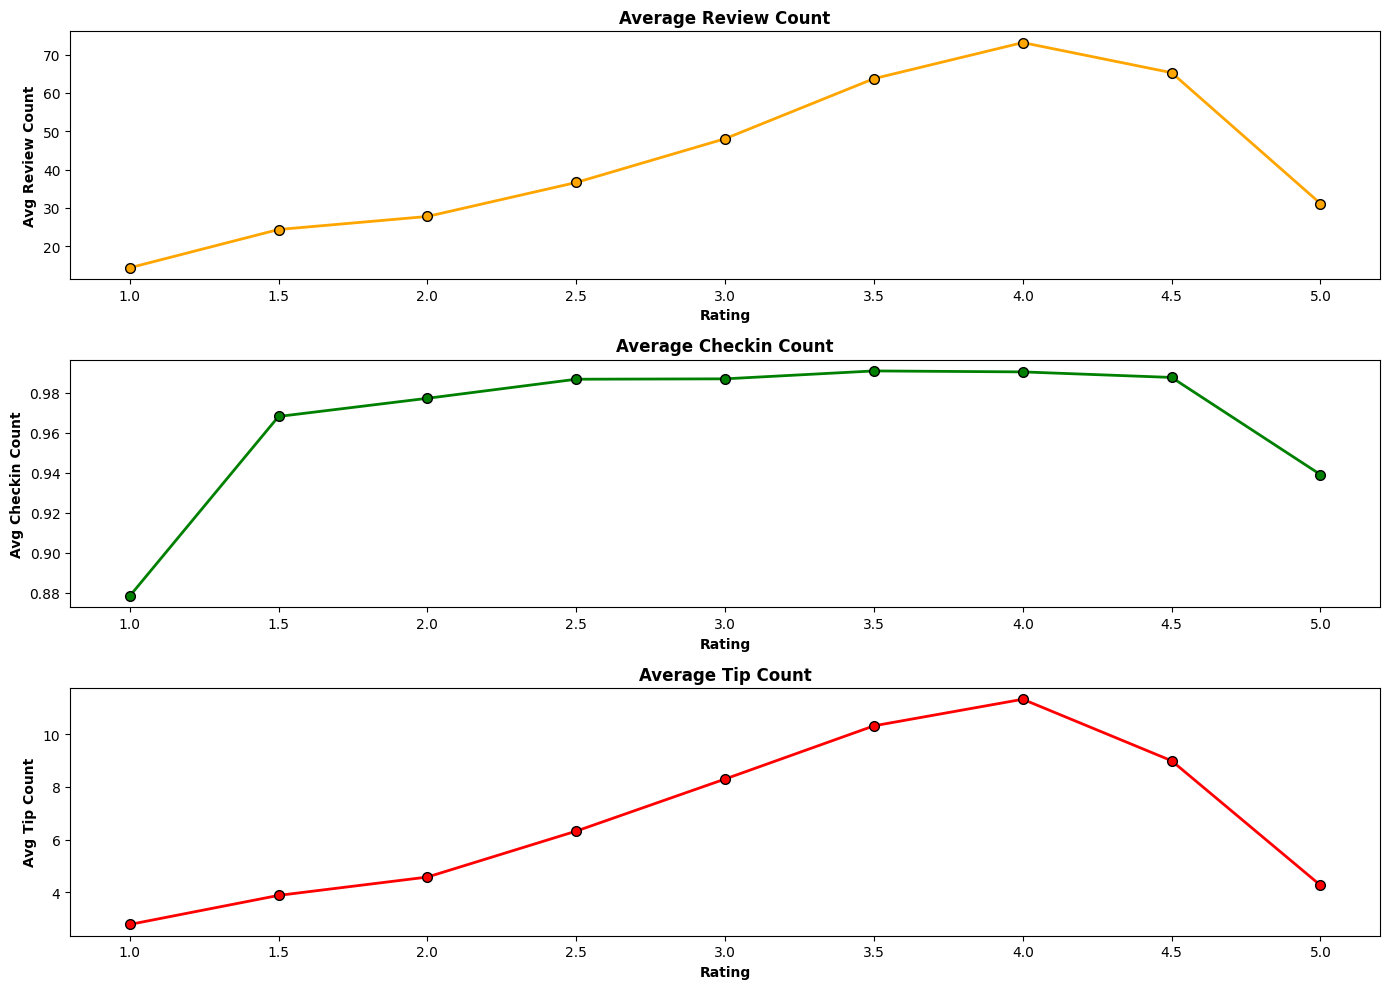

In [64]:


# Set the figure size
plt.figure(figsize=(14, 10))


# Plot 1: Avg Review Count (Line Plot)
plt.subplot(3, 1, 1)
plt.plot(df['rating'], df['avg_review_count'], marker='o', color='orange',markeredgecolor='black', linestyle='-', linewidth=2, markersize=7)
plt.title('Average Review Count', fontweight='bold')
plt.ylabel('Avg Review Count', fontweight='bold')
plt.xlabel('Rating', fontweight='bold')

# Plot 2: Avg Checkin Count (Line Plot)
plt.subplot(3, 1, 2)
plt.plot(df['rating'], df['avg_checkin_count'], marker='o', color='g',markeredgecolor='black', linestyle='-', linewidth=2, markersize=7)
plt.title('Average Checkin Count', fontweight='bold')
plt.ylabel('Avg Checkin Count', fontweight='bold')
plt.xlabel('Rating', fontweight='bold')

# Plot 3: Avg Tip Count (Line Plot)
plt.subplot(3, 1, 3)
plt.plot(df['rating'], df['avg_tip_count'], marker='o', color='r',markeredgecolor='black', linestyle='-', linewidth=2, markersize=7)
plt.title('Average Tip Count', fontweight='bold')
plt.ylabel('Avg Tip Count', fontweight='bold')
plt.xlabel('Rating', fontweight='bold')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()


In [71]:
# their is any correlation between the number of reviews,tips, checkin for business ?
corr_df=pd.read_sql_query(f"""select b.business_id,avg(b.stars) as avg_rating,sum(b.review_count) as review_count, sum(length(ci.date)-length(replace(ci.date,',','')+1)) as chackin_count ,sum(tip.tip_count) as tip_count
from business as b
left join checkin as ci on b.business_id=ci.business_id
left join (select business_id ,count(business_id) as tip_count from tip group by business_id order by tip_count) as tip on b.business_id=tip.business_id where b.business_id in {tuple(business_ids['business_id'])} 
group by b.business_id
""",connection).dropna()

In [73]:
corr_df[['avg_rating','review_count','chackin_count','tip_count']].corr()

,avg_rating,review_count,chackin_count,tip_count
avg_rating,1.000000,0.235316,0.075471,0.148471
review_count,0.235316,1.000000,0.626884,0.766321
chackin_count,0.075471,0.626884,1.000000,0.772088
tip_count,0.148471,0.766321,0.772088,1.000000


<Axes: >

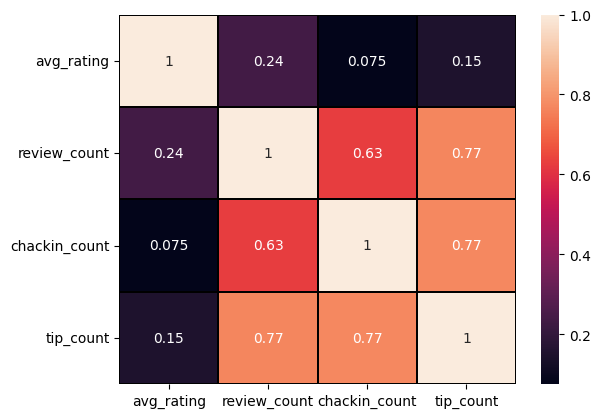

In [81]:
sns.heatmap(corr_df[['avg_rating','review_count','chackin_count','tip_count']].corr(),annot=True,linewidth=0.3,linecolor='black')

In [100]:
# is there a difference in the user engagement between rewiew,tips and checkin and high_rated, low_rated business?
corr_by_rated=pd.read_sql_query(f"""select b.business_id,
    avg(b.stars) as avg_rating,
    sum(b.review_count) as review_count, 
    sum(length(ci.date)-length(replace(ci.date,',','')+1)) as chackin_count ,
    sum(tip.tip_count) as tip_count,
    case when b.stars>=3.5 then 'high-rated'
        else 'low-rated' end as category
from business as b
left join checkin as ci on b.business_id=ci.business_id
left join (select business_id ,count(business_id) as tip_count from tip group by business_id order by tip_count) as tip on b.business_id=tip.business_id where b.business_id in {tuple(business_ids['business_id'])} 
group by b.business_id 
""",connection).dropna()

In [101]:
corr_by_rated.groupby('category')[['review_count','chackin_count','tip_count']].corr()

review_count  chackin_count  tip_count
category                                                        
high-rated review_count       1.000000       0.613178   0.758487
           chackin_count      0.613178       1.000000   0.771363
           tip_count          0.758487       0.771363   1.000000
low-rated  review_count       1.000000       0.670979   0.757439
           chackin_count      0.670979       1.000000   0.768003
           tip_count          0.757439       0.768003   1.000000

In [102]:
corr_by_rated.groupby('category')[['review_count','chackin_count','tip_count']].mean()

,review_count,chackin_count,tip_count
category,,,
high-rated,72.291062,2557.399463,10.162766
low-rated,42.123420,1860.497398,6.541689


In [131]:
import numpy as np

def calculate_success_metric(df):
    """Calculates a success metric for each row in the DataFrame based on the average rating and review count.

    Args:
        df: A pandas DataFrame containing columns 'avg_rating' and 'review_count'.

    Returns:
        A pandas Series containing the calculated success scores for each row in the DataFrame.
    """

    # Ensure review count is non-negative
    df['review_count'] = df['review_count'].apply(lambda x: max(x, 0))

    # Calculate success score using a weighted combination of average rating and log-transformed review count
    success_score = df['avg_rating'] + 0.5 * np.log(df['review_count'] + 1)

    return success_score

In [171]:
# number of restorent in city, state according to review count
resto_in_city=pd.read_sql_query(f"""select city, state,latitude,longitude,avg(stars) as avg_rating,sum(review_count) as review_count,count(*) as no_of_restorent
from business
where business_id in {tuple(business_ids['business_id'])}
group by state,city
order by review_count desc
limit 200
 """,connection)


         latitude   longitude  avg_rating   review_count  no_of_restorent
count  200.000000  200.000000  200.000000     200.000000       200.000000
mean    36.900389  -83.608823    3.474346    8071.480000       138.130000
std      5.119384   11.249550    0.220874   19224.781248       329.452878
min     27.713401 -119.882367    2.914062    1191.000000        13.000000
25%     34.409310  -89.931613    3.328982    1902.000000        34.000000
50%     39.712929  -82.395370    3.466800    3038.000000        56.500000
75%     40.044508  -75.214432    3.613597    4853.750000        95.000000
max     53.512604  -74.713177    4.092593  175487.000000      3001.000000


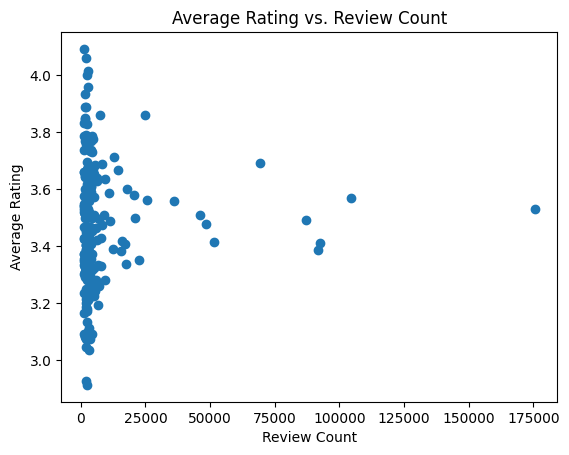

In [172]:
df=resto_in_city
print(df.describe())



# Visualization of average rating vs. review count
plt.scatter(df['review_count'], df['avg_rating'])
plt.xlabel('Review Count')
plt.ylabel('Average Rating')
plt.title('Average Rating vs. Review Count')
plt.show()

In [173]:
resto_in_city['success_score'] = calculate_success_metric(resto_in_city)

In [174]:
resto_in_city


,city,state,latitude,longitude,avg_rating,review_count,no_of_restorent,success_score
0,Philadelphia,PA,39.955505,-75.155564,3.532156,175487,3001,9.569819
1,Tampa,FL,27.890814,-82.502346,3.571429,104376,1715,9.349311
2,Indianapolis,IN,39.637133,-86.127217,3.412111,92639,1701,9.130349
3,Tucson,AZ,32.338572,-111.010760,3.386187,91613,1419,9.098857
4,Nashville,TN,36.208102,-86.768170,3.493590,87070,1404,9.180829
...,...,...,...,...,...,...,...,...
195,Green Valley,AZ,31.905520,-110.988340,3.166667,1225,24,6.722423
196,Lafayette Hill,PA,40.092182,-75.260216,3.785714,1218,14,7.338607
197,Pennsauken,NJ,39.964188,-75.050313,3.347826,1206,46,6.895773
198,Pitman,NJ,39.732375,-75.130925,3.833333,1195,21,7.376702


In [175]:
import pandas as pd
import folium

# Assuming your dataset is in a CSV file named 'your_dataset.csv'
df=resto_in_city

# Create a Folium map centered on the United States
m = folium.Map(location=[37.0902, -95.7129], zoom_start=4)

# Add markers for each city with a popup displaying relevant information
for index, row in df.iterrows():
    popup_text = f"""
    <b>City:</b> {row['city']} ({row['state']})<br>
    <b>Average Rating:</b> {row['avg_rating']}<br>
    <b>Review Count:</b> {row['review_count']}<br>
    <b>Number of Restaurants:</b> {row['no_of_restorent']}<br>
    <b>Success Score:</b> {row['success_score']}
    """
    folium.Marker([row['latitude'], row['longitude']]).add_to(m).add_child(folium.Popup(popup_text))

# Display the map
m